In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding the Math Behind Perceptron

Generally, a perceptron is a combination of two functions: 
1. Sum of products of weights and features, with bais. 
$$
z= w_0 X_0 + w_1 X_1 + w_2 X_2 + ... + w_n X_n  
z= \sum_{i=1}^{n} w_i X_i
$$
where $w_0$ is bais and $X_0$ is '1'
1. Activation function that converts the linear output of the first function into non-linear.


The objective is to build a perceptron (or a decision boundary) that will help us binomially classify the dataset.

In [3]:
#Model


def step(summation):
    return 1 if summation > 0 else 0


def Perceptron(X, y, lr=0.1, epocs=1000):
    X['constant']= 1
    cols= X.columns.tolist()
    weights= np.ones(shape=(len(cols),1))

    for i in range(epocs):
        random_data_index=np.random.choice(X.index)
        random_data= np.array(X.iloc[random_data_index])
        summation= np.transpose(weights)@random_data
        random_data=random_data.reshape(-1,1)
        weights= weights + (int(y.iloc[random_data_index]) - step(summation))*lr*random_data
    return weights[0:2], weights[-1]

The function above returns 2 arrays, with the first one being the weights and the second one being the bais.

In [13]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate a binary classification dataset
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state= 0
)
X=pd.DataFrame(X)
y=pd.Series(y)

In [17]:
Perceptron(X=X, y=y, lr=0.1, epocs=100000)

(array([[-0.36290241],
        [ 0.48426378]]),
 array([0.3]))

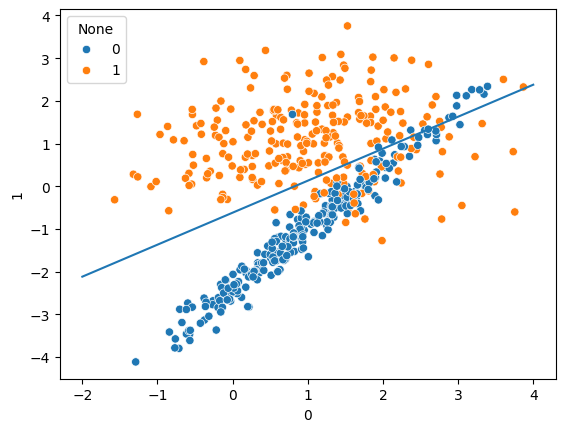

In [18]:
x_val= range(-2,5)
y_val= [((0.36290241/0.48426378)*x - 0.3/0.48426378) for x in x_val]
sns.lineplot(x=range(-2,5), y= y_val)
sns.scatterplot(data=X, x=X[0], y=X[1], hue=y)
plt.show()